In [1]:
# moody - plot a Moody diagram using the f=16/Re convention
# Copyright 2008 Grant Ingram
##     This program is free software: you can redistribute it and/or modify
##     it under the terms of the GNU General Public License as published by
##     the Free Software Foundation, either version 3 of the License, or
##     (at your option) any later version.

##     This program is distributed in the hope that it will be useful,
##     but WITHOUT ANY WARRANTY; without even the implied warranty of
##     MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
##     GNU General Public License for more details.

##     You should have received a copy of the GNU General Public License
##     along with this program.  If not, see <http://www.gnu.org/licenses/>

In [2]:
from pylab import *

In [3]:
# Diagram Ranges
xmin = 600; xmax = pow(10,8);
ymin = 0.002; ymax = 0.025;
ylabels =[]
ytickloc = [0.002,0.0025,0.003,0.004,0.005,0.006,0.007,0.008,0.01,0.012,0.014,0.016,0.018,0.02,0.025]
for i in ytickloc: ylabels.append(str(i))

# Laminar Portion
Relam =arange(600,4000,100)
flam = 16.0 / Relam

#Turbulent Regions
Returb = arange(3000,pow(10,8),1000)
fsmooth = 0.079 * pow(Returb,-0.25) # Blausis formula for smooth turbulent pipe flow

#Rough Pipes
kdlabels = []
kd = [0.00001,0.00005,0.001,0.0002,0.0004,0.0006,0.0008,0.001,0.002,0.004,0.006,0.008,0.01,0.015,0.02,0.03,0.04,0.05]
for i in kd: kdlabels.append(str(i))
frough = []

for i in kd: # The formula used is from Haaland quoted in Massey, Mechanics of Fluids, 6th Edition, Chapman and Hall, 1989
    A = -3.6 * log10(6.9/Returb + pow( ((1/3.71) * i), 1.11) ) 
    f = pow(1.0/A,2)
    frough.append(f)

/ext/sage/sage-8.0/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


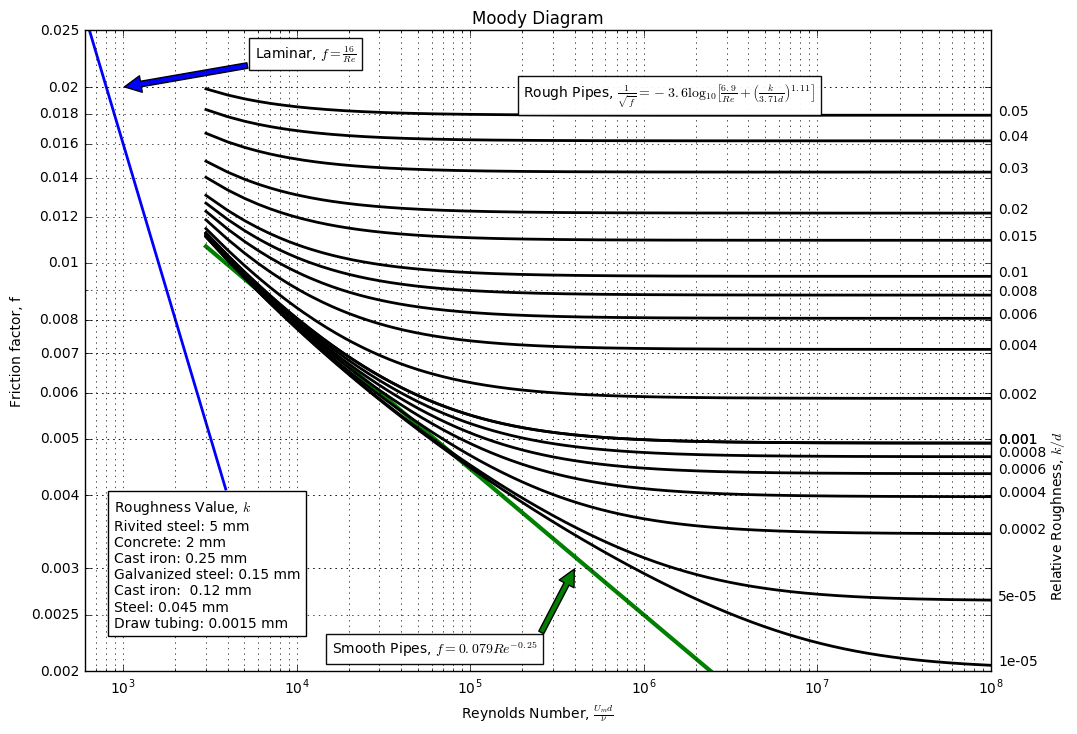

In [4]:
figure(figsize = (11.6929134,8.26771654)) #This makes the picture A4 matplot accepts dimensions in inches...
xscale('log')
yscale('log')

# Plot the data
plot(Relam, flam,linewidth='2')
plot(Returb, fsmooth,linewidth='3')
for (i,j) in zip(frough,kdlabels):
    plot(Returb, i,'k',linewidth='2')
    text(Returb[-1]*1.1,i[-1],j)

# Add some text data
figtext(0.95,0.40,r'Relative Roughness, $k/d$', rotation='vertical')
figtext(0.50,0.82,\
        r'Rough Pipes, $\frac{1}{\sqrt{f}} = -3.6 \log_{10}  \left[ \frac{6.9}{Re} + \left(\frac{k}{3.71d}\right)^{1.11} \right]$',\
        bbox=dict(facecolor='white', alpha=0.95))
annotate(r'Laminar, $f = \frac{16}{Re}$', xy=(1000, 0.02),  xycoords='data',
                xytext=(0.3, 0.98), textcoords='axes fraction',
                arrowprops=dict(facecolor='blue', shrink=0.01),
                horizontalalignment='right', verticalalignment='top',bbox=dict(facecolor='white', alpha=0.95)
                )
annotate(r'Smooth Pipes, $f = 0.079 Re^{-0.25}$', xy=(400000, 0.003),  xycoords='data',
                xytext=(0.5, 0.05), textcoords='axes fraction',
                arrowprops=dict(facecolor='green', shrink=0.01),
                horizontalalignment='right', verticalalignment='top',bbox=dict(facecolor='white', alpha=0.95)
                )
figtext(0.15,0.18,\
        "Roughness Value, $k$\nRivited steel: 5 mm\nConcrete: 2 mm \nCast iron: 0.25 mm \nGalvanized steel: 0.15 mm\nCast iron:  0.12 mm\nSteel: 0.045 mm\nDraw tubing: 0.0015 mm"\
        ,bbox=dict(facecolor='white', alpha=1.0))

# Axes details
grid(True)
gca().xaxis.grid(True, which='minor')  # minor grid on too
gca().yaxis.grid(True, which='minor')  # minor grid on too
title('Moody Diagram')
ylabel('Friction factor, f')
xlabel(r'Reynolds Number, $\frac{U_m d}{\nu}$')
xlim( xmin, xmax )
ylim( ymin,ymax )
yticks(ytickloc,ylabels)
savefig('moody.png',dpi = 600)
show()
